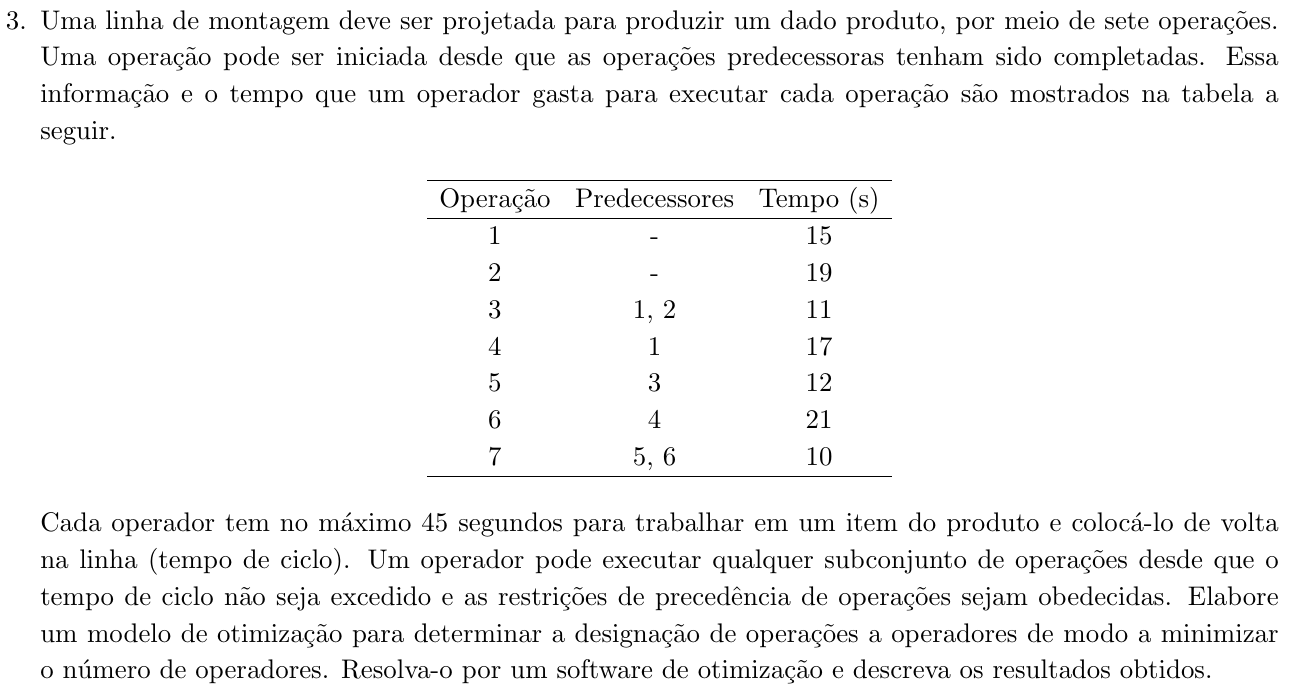

In [2]:
from IPython.display import Image
Image(filename='images/3.png')

In [3]:
# Módulos
from pyomo.environ import *
from pyomo.opt import SolverFactory

In [4]:
# Dados
Tarefa = [i for i in range(1, 8)]
Estacao = [i for i in range(1, 8)]
tempos = {1: 15, 2: 19, 3: 11, 4: 17, 5: 12, 6: 21, 7:10}
precedencia = [(1, 3), (2, 3), (1, 4), (3, 5), (4, 6), (5, 7), (6, 7)]
ciclo = 45

In [5]:
# Modelo
model = ConcreteModel()

# Conjuntos
model.T = Set(initialize=Tarefa)
model.E = Set(initialize=Estacao)
T,E = model.T, model.E

# Parâmetros
model.t = Param(T, initialize=tempos, within=NonNegativeReals)
model.c = Param(initialize=ciclo)
t, c = model.t, model.c

# Variáveis de decisão
model.x = Var(T * E, within=Binary)
x = model.x

# Função objetivo
model.obj = Objective(sense=minimize,
                      expr = sum(j * x[T.at(-1), j] for j in E))

# Restrições
# Indivisibilidade 
model.r_indiv = ConstraintList()
for i in T:
    model.r_indiv.add(expr = sum(x[i, j] for j in E) == 1)
# Carga respeita ciclo
model.r_ciclo = ConstraintList()
for j in E:
    model.r_ciclo.add(expr = sum(t[i]*x[i,j] for i in T) <= c)
# Precedencia
model.r_preced = ConstraintList()
for par in precedencia:
    i = par[0]
    k = par[1]
    model.r_preced.add(expr = sum(j*x[i,j] for j in E) - sum(j*x[k,j] for j in E) <= 0)

# model.pprint()

In [6]:
# Resolução
solver = SolverFactory('glpk')
resultado = solver.solve(model, tee = False)

In [7]:
# Apresentação de resultados
if (resultado.solver.status == SolverStatus.ok) and (resultado.solver.termination_condition != TerminationCondition.infeasible):
    for j in E:
        for i in T:
            if value(x[i,j]) == 1:
                print('Tarefa {} vai para o operador {}\n'.format(i,j))
else:
    print(resultado.solver.termination_condition)

Tarefa 1 vai para o operador 1

Tarefa 2 vai para o operador 1

Tarefa 3 vai para o operador 1

Tarefa 4 vai para o operador 2

Tarefa 5 vai para o operador 2

Tarefa 6 vai para o operador 3

Tarefa 7 vai para o operador 3

